## Project
## Youtuber Streamer Analysis EDA

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('youtubers_df.csv')

In [3]:
data.shape

(1000, 9)

In [4]:
data.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [5]:
data.tail()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...
999,1000,OneindiaHindi,Noticias y Política,11700000.0,India,2200.0,31.0,1.0,http://youtube.com/channel/UCOjgc1p2hJ4GZi6pQQ...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [7]:
data.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

**Change the column name**

In [8]:
data.rename(columns={'Suscribers':'Subscribers'},inplace=True)

In [9]:
data.columns

Index(['Rank', 'Username', 'Categories', 'Subscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

**Dealing missing values**

In [10]:
data.isnull().sum()

Rank             0
Username         0
Categories     306
Subscribers      0
Country          0
Visits           0
Likes            0
Comments         0
Links            0
dtype: int64

**Fill Missing values**

In [11]:
data['Categories'].fillna('Unknown', inplace = True)

**To Check**

In [12]:
data.isnull().sum()

Rank           0
Username       0
Categories     0
Subscribers    0
Country        0
Visits         0
Likes          0
Comments       0
Links          0
dtype: int64

In [13]:
data.describe()

,Rank,Subscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [14]:
data[['Subscribers','Likes', 'Comments']].describe()

,Subscribers,Likes,Comments
count,1.000000e+03,1.000000e+03,1000.000000
mean,2.189440e+07,5.363259e+04,1288.768000
std,1.682775e+07,2.580457e+05,6778.188308
min,1.170000e+07,0.000000e+00,0.000000
25%,1.380000e+07,4.717500e+02,2.000000
50%,1.675000e+07,3.500000e+03,67.000000
75%,2.370000e+07,2.865000e+04,472.000000
max,2.495000e+08,5.300000e+06,154000.000000


In [15]:
top_creators_subscribers = data.sort_values(by='Subscribers',
                         ascending=False).head(10)
print("Top Content Creators by Subscribers:\n",
      top_creators_subscribers[['Username', 'Subscribers']])

Top Content Creators by Subscribers:
              Username  Subscribers
0             tseries  249500000.0
1             MrBeast  183500000.0
2           CoComelon  165500000.0
3            SETIndia  162600000.0
4       KidsDianaShow  113500000.0
5           PewDiePie  111500000.0
6  LikeNastyaofficial  107500000.0
7         VladandNiki  101400000.0
8     zeemusiccompany   99700000.0
9                 WWE   97200000.0


**Trending Analysis**

In [16]:
category_counts = data['Categories'].value_counts()
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

**Using Matplotlib library**
,**Correlation Analysis**

<Figure size 1200x800 with 0 Axes>

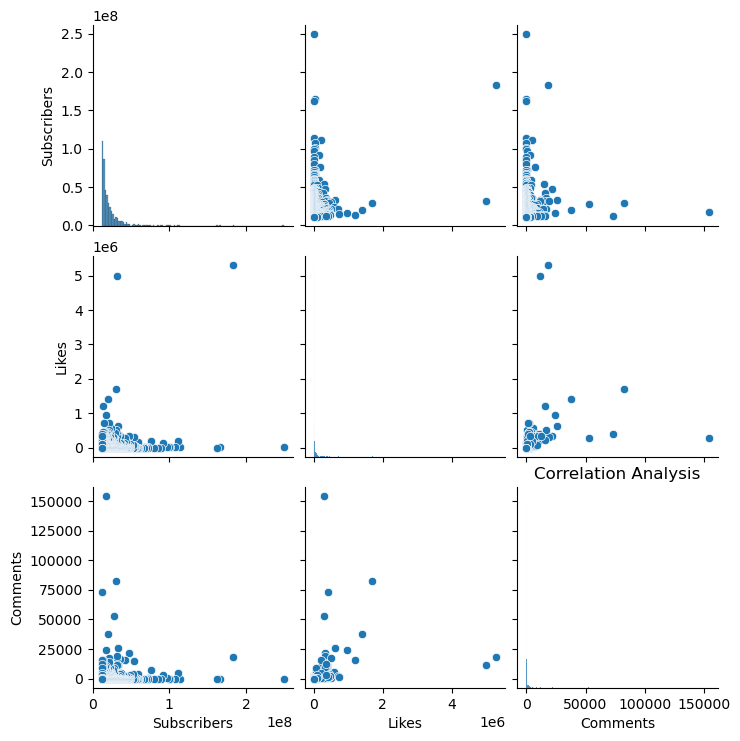

In [17]:
plt.figure(figsize=(12, 8))
sns.pairplot(data[['Subscribers', 'Likes', 'Comments']])
plt.title('Correlation Analysis')
plt.show()

**Analysis of audience**

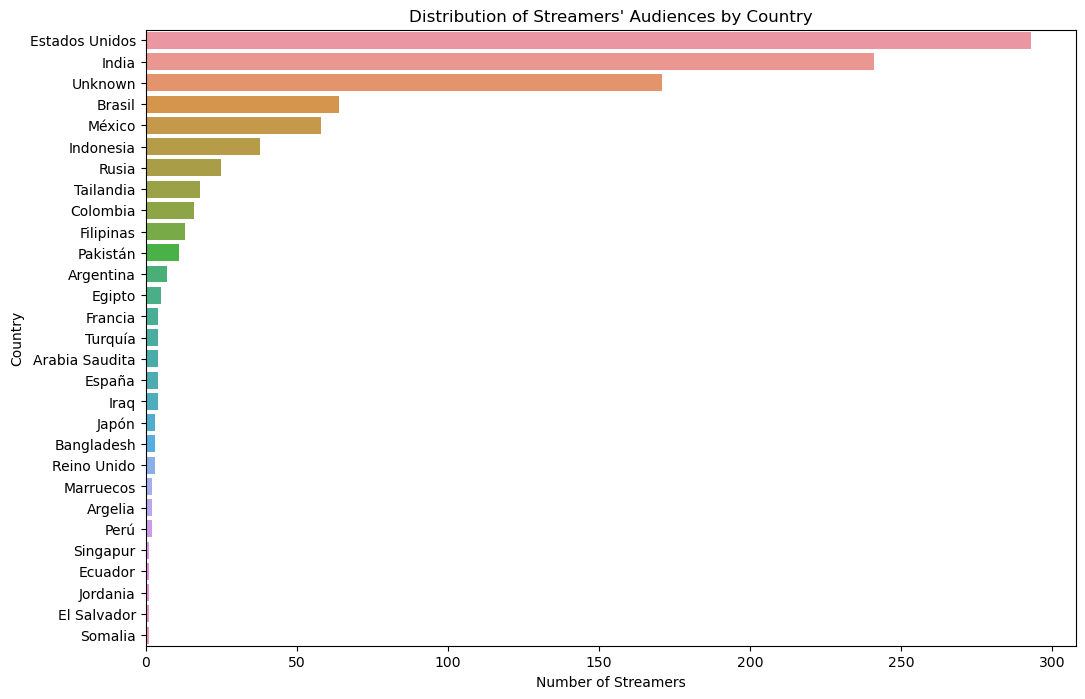

In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Country', data=data, 
              order=data['Country'].value_counts().index)
plt.title('Distribution of Streamers\' Audiences by Country')
plt.xlabel('Number of Streamers')
plt.ylabel('Country')
plt.show()

**Matrics Performance**

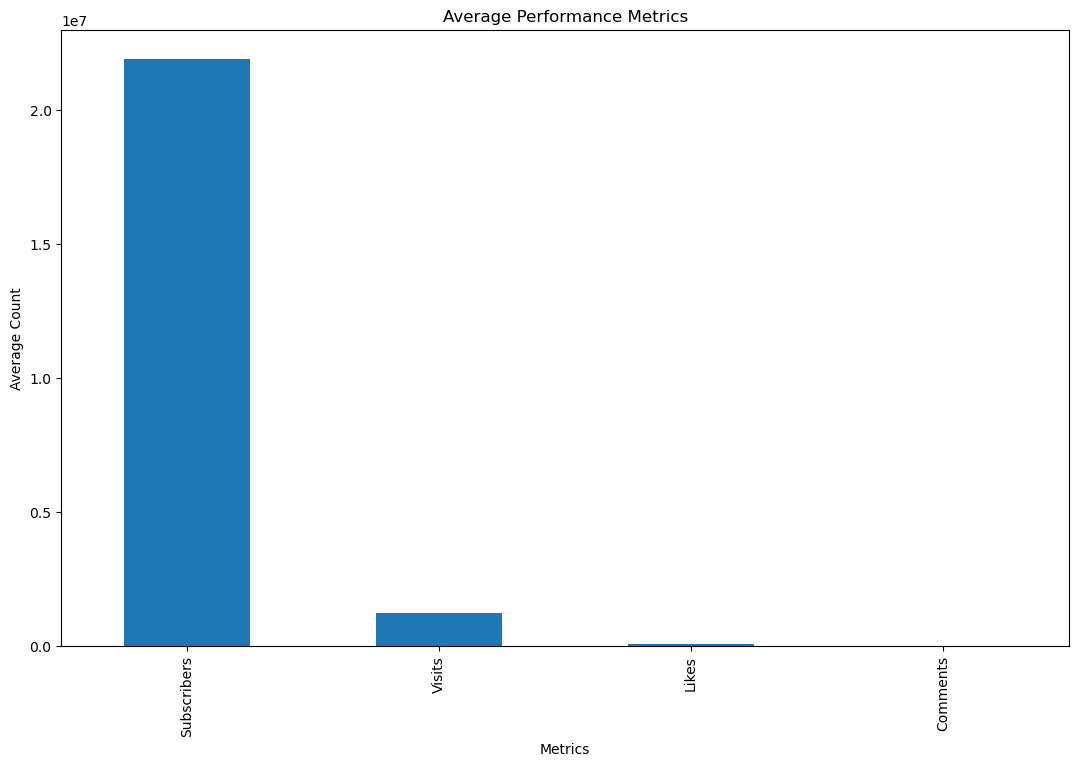

In [19]:
average_metrics = data[['Subscribers', 'Visits', 'Likes', 'Comments']].mean()
plt.figure(figsize=(13, 8))
average_metrics.plot(kind='bar')
plt.title('Average Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Count')
plt.show()

**To check which content category**

In [20]:
category_distribution = data['Categories'].value_counts()
print(category_distribution)

Categories
Unknown                               306
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor  

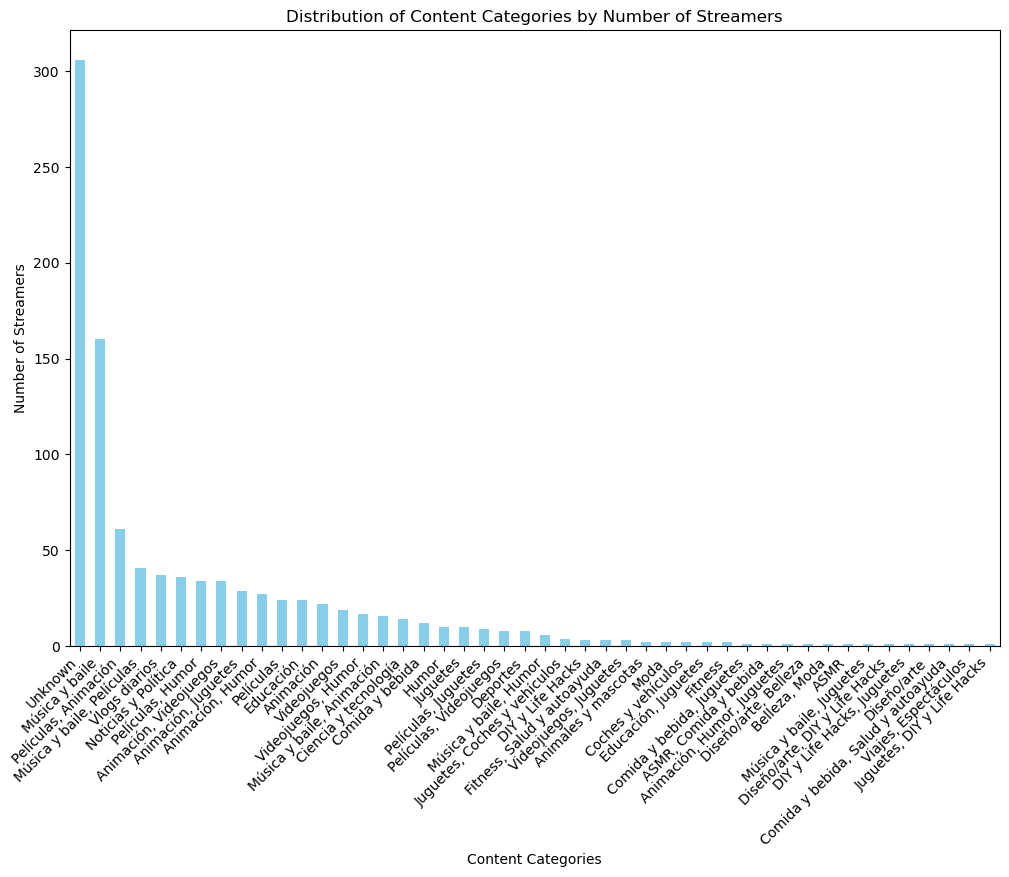

In [21]:
plt.figure(figsize=(12, 8))
category_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Content Categories by Number of Streamers')
plt.xlabel('Content Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45, ha='right') 
plt.show()

**Comparison,Standardization**

In [22]:
top_performers = data[(data['Subscribers'] > data['Subscribers'].mean()) &
                    (data['Visits'] > data['Visits'].mean()) &
                    (data['Likes'] > data['Likes'].mean()) &
                    (data['Comments'] > data['Comments'].mean())]
print("Top-performing Content Creators:\n", top_performers[
    ['Username', 'Subscribers', 'Visits', 'Likes', 'Comments']])

Top-performing Content Creators:
                   Username  Subscribers       Visits      Likes  Comments
1                  MrBeast  183500000.0  117400000.0  5300000.0   18500.0
5                PewDiePie  111500000.0    2400000.0   197300.0    4900.0
26             dudeperfect   59700000.0    5300000.0   156500.0    4200.0
34             TaylorSwift   54100000.0    4300000.0   300400.0   15000.0
39             JuegaGerman   48600000.0    2000000.0   117100.0    3000.0
43                A4a4a4a4   47300000.0    9700000.0   330400.0   22000.0
58               Mikecrack   43400000.0    2200000.0   183400.0    1800.0
62          KimberlyLoaiza   42100000.0    5300000.0   271300.0   16000.0
64         luisitocomunica   41100000.0    2500000.0   128900.0    1800.0
70             JessNoLimit   39600000.0    1300000.0    73500.0    1600.0
96          TotalGaming093   36300000.0    1500000.0   129400.0    4900.0
98    TechnoGamerzOfficial   35600000.0    6200000.0   341800.0   16500.0
100 